In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt

/home/lizx43/anaconda3/envs/gigapath/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
n_clusters = 64
embeddings_df20X = pd.read_hdf('20Xtile_w_64cluster_fix.h5')

In [3]:
import matplotlib.image as mpimg
def plot_images(image_paths, title):
    fig, axes = plt.subplots(2, 10, figsize=(20, 4))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(image_paths):
            img = mpimg.imread(image_paths[i])
            ax.imshow(img)
            ax.axis('off')
    plt.show()

In [4]:
# image_dir = './20XTiles/'

# for i in range(n_clusters):
#     print('cluster_num', i)
#     filenames = []
#     cluster_df = embeddings_df20X[embeddings_df20X['cluster']==i]
#     cluster_df = cluster_df.sample(n=20)
#     for row in cluster_df.iterrows():
#         row = row[1]
#         slide_id = row.ids
#         coord1 = int(row.coord1)
#         coord2 = int(row.coord2)
#         filename = image_dir+str(slide_id)+'/'+str(coord1)+'x_'+str(coord2)+'y.jpg'
#         filenames.append(filename)
#     image_paths = filenames
#     plot_images(image_paths, f"Cluster {i} - Random 20")

### Draw Umap

In [5]:
umap_embeddings = None
input_embed = embeddings_df20X.sample(frac=0.1, random_state=42)
for df in [input_embed]:
    df=df.dropna()
    # reducer = umap.UMAP(n_neighbors=20, min_dist=0.99, n_components=2, random_state=42, verbose=True)
    reducer = umap.UMAP(n_neighbors=20, min_dist=0.9, n_components=2, random_state=42, verbose=True)
    umap_embeddings = reducer.fit_transform(df.iloc[:, :1536], df['cluster'])

/home/lizx43/anaconda3/envs/gigapath/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(min_dist=0.9, n_jobs=1, n_neighbors=20, random_state=42, verbose=True)
Wed Aug  7 15:10:35 2024 Construct fuzzy simplicial set
Wed Aug  7 15:10:35 2024 Finding Nearest Neighbors
Wed Aug  7 15:10:35 2024 Building RP forest with 18 trees
Wed Aug  7 15:10:46 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed Aug  7 15:11:04 2024 Finished Nearest Neighbor Search
Wed Aug  7 15:11:06 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Wed Aug  7 15:12:40 2024 Finished embedding


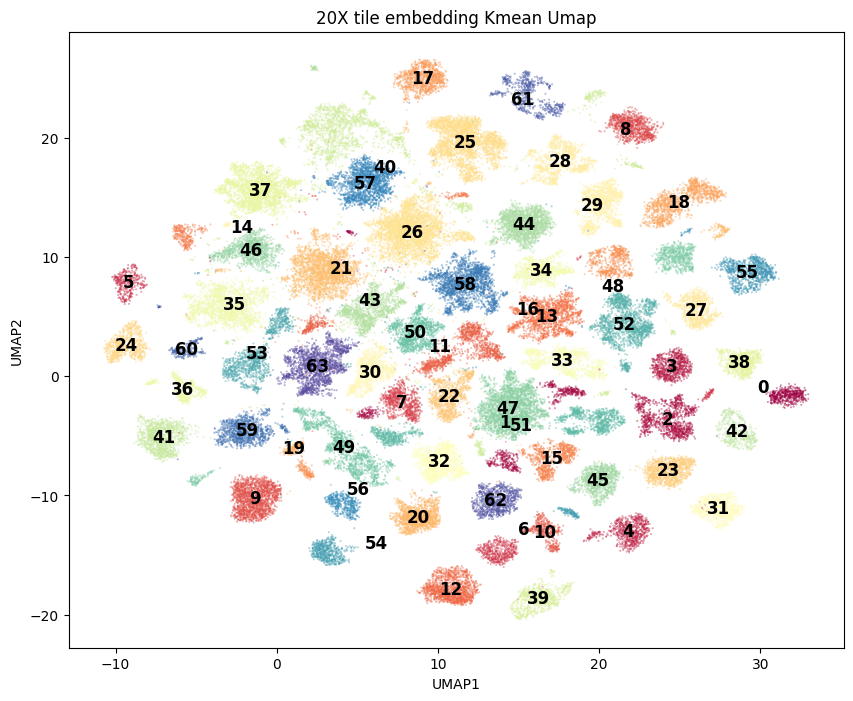

In [6]:
centroids = np.array([umap_embeddings[input_embed['cluster'] == i].mean(axis=0) for i in range(n_clusters)])

def plot_umap_fig(umap_embeddings, label, title):
    umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
    umap_df['Label'] = list(label)

    # Plot the UMAP result
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Label'], cmap='Spectral', alpha=0.7, s=0.1)
    # for label in umap_df['Label'].unique():
    #     subset = umap_df[umap_df['Label'] == label]
    #     plt.scatter(subset['UMAP1'], subset['UMAP2'], label=label, cmap='Spectral', alpha=0.7, s=0.1)

    # plt.colorbar(scatter, label='Cluster')
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], str(i), fontsize=12, ha='center', va='center', color='black', weight='bold')

    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    # plt.legend(markerscale=30)

    plt.show() 
plot_umap_fig(umap_embeddings, input_embed['cluster'], title='20X tile embedding Kmean Umap')

/tmp/ipykernel_577091/261090090.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['UMAP1'], subset['UMAP2'], label=label, cmap='Spectral', alpha=0.7, s=0.1)


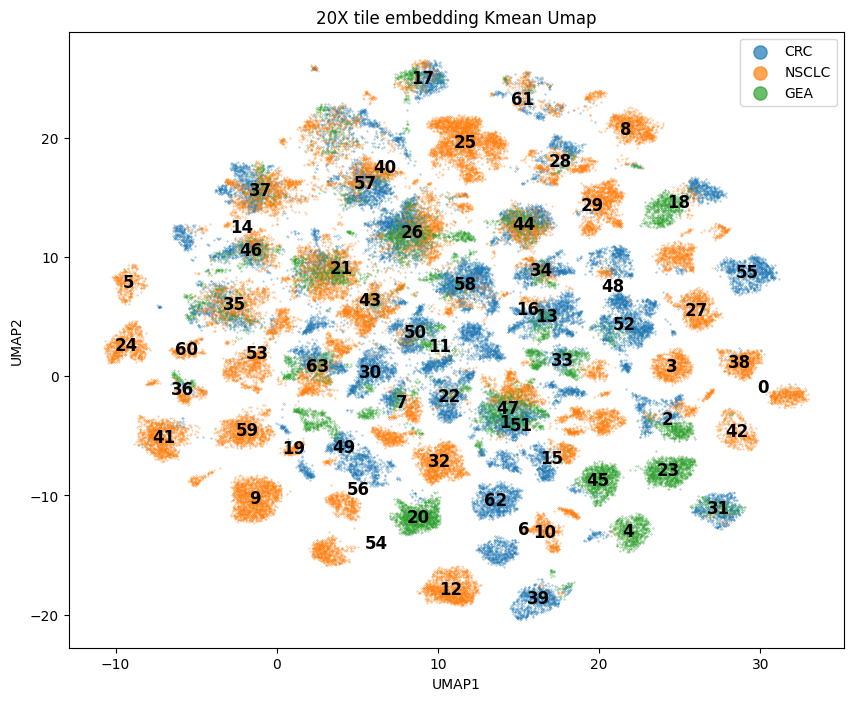

In [7]:

def plot_umap_fig(umap_embeddings, label, title):
    umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
    umap_df['Label'] = list(label)

    # Plot the UMAP result
    plt.figure(figsize=(10, 8))
    for label in umap_df['Label'].unique():
        subset = umap_df[umap_df['Label'] == label]
        plt.scatter(subset['UMAP1'], subset['UMAP2'], label=label, cmap='Spectral', alpha=0.7, s=0.1)
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], str(i), fontsize=12, ha='center', va='center', color='black', weight='bold')

    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(markerscale=30)

    plt.show() 
plot_umap_fig(umap_embeddings, input_embed['data_source'], title='20X tile embedding Kmean Umap')

In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from utils import utils_fun
sheets_directory = '../get_data/data_sheets/'
utils_fun.list_files(sheets_directory)

['image_id_res.csv',
 'FINAL_Reconciled_SampleID_clinical_NSCLC_GEA.xlsx',
 'CRC_CLI_M21-404-HE_harmonized_feature_table.xlsx',
 'FINAL_Reconciled_sampleID_clinical_CRC.xlsx']

In [9]:
file_path_crc = sheets_directory+ 'FINAL_Reconciled_sampleID_clinical_CRC.xlsx'
file_path_gea = sheets_directory+ 'FINAL_Reconciled_SampleID_clinical_NSCLC_GEA.xlsx'
df_crc = pd.read_excel(file_path_crc, sheet_name='Outcome Statistical (Internal)', na_values=['NA', 'N/A'])
df_gea = pd.read_excel(file_path_gea, sheet_name='Outcome Analysis (Internal)', na_values=['NA', 'N/A'])


In [10]:
sample_loc = []
url_prefix = 'https://concentriq.abbvienet.com/imageSets/157?slide='
for row in input_embed.iterrows():
    row = row[1]
    if row['data_source']=='CRC':
        sample_loc.append(list(df_crc[df_crc['HE Concentriq Image ID']==int(row['ids'])]['Sample collection Location'])[0])
    else:
        sample_loc.append(list(df_gea[df_gea['HE Concentriq Image URL']==(url_prefix+str(row['ids']))]['Sample Location'])[0])

In [11]:
# df_crc['Sample collection Location']
df_gea['Sample Location'].unique()


array(['Lung', 'Brain', 'Lymph Node', 'Esophagus', 'Bronchus', 'Liver',
       'Skin', 'Abdomen/Abdominal wall', 'Omentum', False, 'Adrenals',
       'Stomach', nan, 'Other', 'Bone', 'Soft tissue',
       'Gastroesophageal Junction', 'LYMPHNODE_METASTASIS', 'Chest wall',
       'Pleura'], dtype=object)

In [12]:
sample_loc = pd.Series(sample_loc).replace(['0', 'other', 'Other', 'nan', np.nan, False], 'NA')
sample_loc = pd.Series(sample_loc).replace(['LYMPHNODE_METASTASIS'], 'Lymph Node')

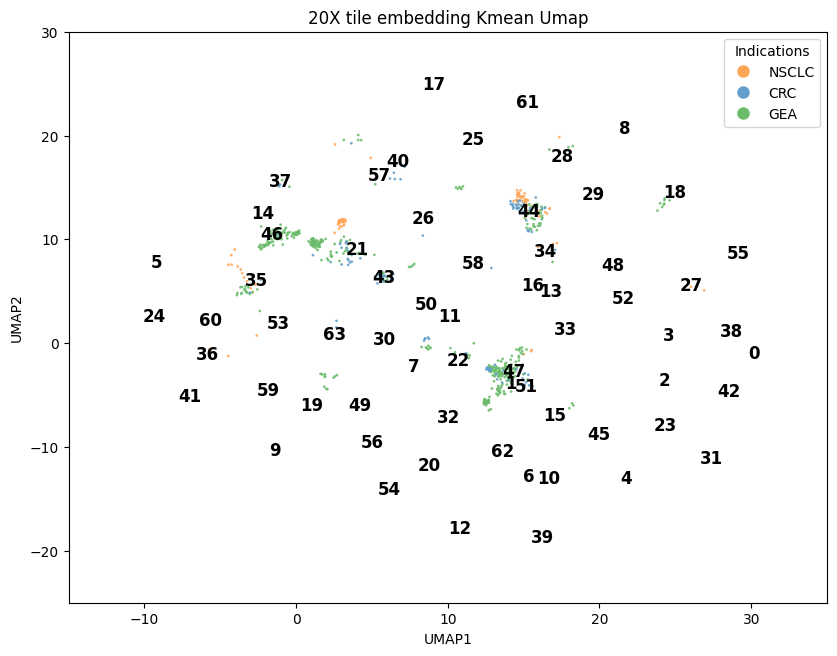

In [67]:
import matplotlib.colors as mcolors

def plot_umap_fig(umap_embeddings, labels, data_source, title):
    umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
    umap_df['Label'] = list(labels)
    umap_df['data_source']=list(data_source)
    unique_labels = umap_df['Label'].unique()

    # Create a color map
    color_dict = {
        'NSCLC': '#ffa557',
        'CRC': '#629fca',
        'GEA': '#6abc6b'
    }
    # Plot the UMAP result
    plt.figure(figsize=(12, 10))

    # Replace here as unique_labels[:8], unique_labels[8:16], unique_labels[16:], since the color is not differentable if too much color
    for idx, label in enumerate(unique_labels[16:]):
        subset = umap_df[umap_df['Label'] == label]
        colors = [color_dict[string] for string in list(subset['data_source'])]
        plt.scatter(subset['UMAP1'], subset['UMAP2'], c=colors, alpha=0.8, s=1)
  
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], str(i), fontsize=12, ha='center', va='center', color='black', weight='bold')

    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

    # Move legend outside the plot
    # plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', title="Categories")
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) 
            for label, color in color_dict.items()]

    plt.legend(handles=handles, title="Indications")

    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the layout to make room for the legend
    plt.xlim(-15, 35)
    plt.ylim(-25, 30)

    plt.show()

plot_umap_fig(umap_embeddings, sample_loc, input_embed['data_source'], title='20X tile embedding Kmean Umap')

/tmp/ipykernel_577091/499480336.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset['UMAP1'], subset['UMAP2'], label=label, cmap='Spectral', alpha=0.8, s=2)


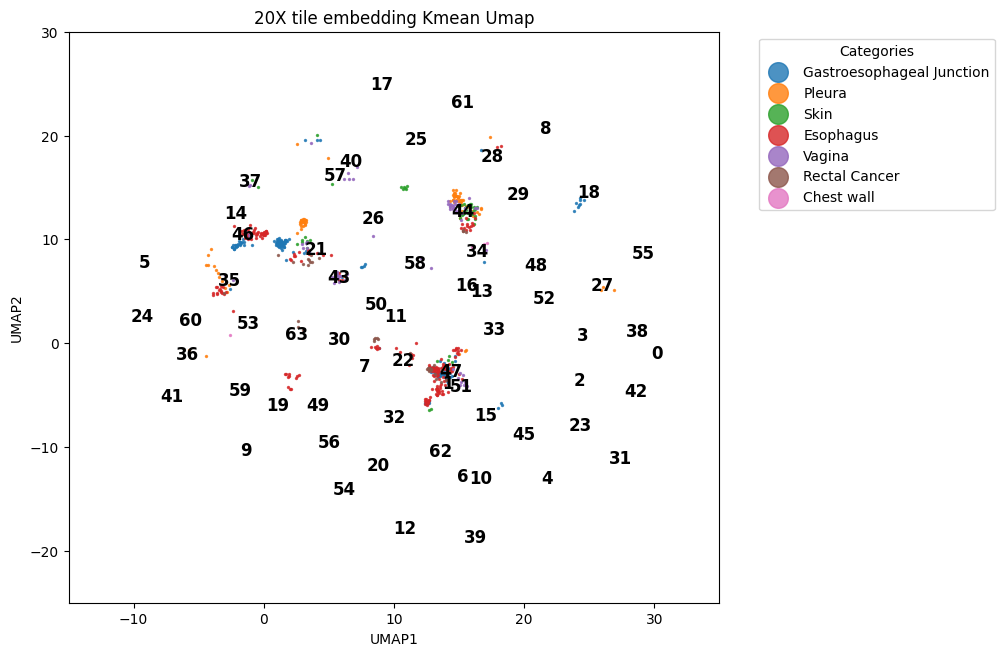

In [64]:
import matplotlib.colors as mcolors

def plot_umap_fig(umap_embeddings, labels, data_source, title):
    umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
    umap_df['Label'] = list(labels)
    umap_df['data_source']=list(data_source)
    unique_labels = umap_df['Label'].unique()

    # Plot the UMAP result
    plt.figure(figsize=(14, 10))

    # Replace here as unique_labels[:8], unique_labels[8:16], unique_labels[16:], since the color is not differentable if too much color
    for label in unique_labels[16:]:
        subset = umap_df[umap_df['Label'] == label]
        plt.scatter(subset['UMAP1'], subset['UMAP2'], label=label, cmap='Spectral', alpha=0.8, s=2)
  
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], str(i), fontsize=12, ha='center', va='center', color='black', weight='bold')

    plt.title(title)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')

    # Move legend outside the plot
    plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', title="Categories")

    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the layout to make room for the legend
    plt.xlim(-15, 35)
    plt.ylim(-25, 30)

    plt.show()

plot_umap_fig(umap_embeddings, sample_loc, input_embed['data_source'], title='20X tile embedding Kmean Umap')